<a href="https://colab.research.google.com/github/KulsoomA20/DLRL_Umme_Kulsoom_A/blob/main/LSTM/Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

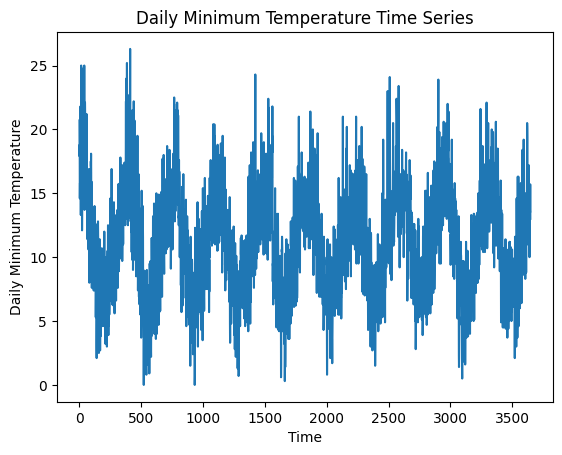

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0632
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0134
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0128
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0114
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0099
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0100
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095
Epoch 13/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0097
Epoch 14/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0101
Epoch 15/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,355 (403.73 KB)

 Trainable params: 34,451 (134.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,904 (269.16 KB)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train RMSE: 2.46
Test RMSE: 2.36


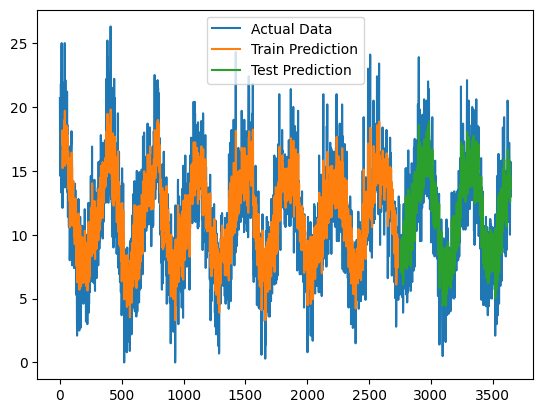

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


#Load Dataset

data = pd.read_csv("1_Daily_minimum_temps.csv")
data['Temp'] = pd.to_numeric(data['Temp'], errors='coerce')
data.dropna(inplace=True)
dataset = data['Temp'].values.reshape(-1, 1).astype("float32")

plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Daily Minimum Temperature")
plt.title("Daily Minimum Temperature Time Series")
plt.show()

#Scaling

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.75)
train = dataset[:train_size]
test = dataset[train_size:]


# Time-Series Windows

time_stamp = 20  # Increased window size

def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

trainX, trainY = create_dataset(train, time_stamp)
testX, testY = create_dataset(test, time_stamp)

trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])


# Improved LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, time_stamp)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


# Training

early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

model.fit(
    trainX,
    trainY,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

model.summary()


# Predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform(trainY.reshape(-1, 1))

testPredict = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform(testY.reshape(-1, 1))


#  Evaluation

trainScore = math.sqrt(mean_squared_error(trainY_inv, trainPredict))
testScore = math.sqrt(mean_squared_error(testY_inv, testPredict))

print(f"Train RMSE: {trainScore:.2f}")
print(f"Test RMSE: {testScore:.2f}")


#  Visualization

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stamp:len(trainPredict) + time_stamp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_stamp * 2) + 1:len(dataset) - 1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label="Actual Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.legend()
plt.show()
